# IMPORT

In [171]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from sklearn import metrics
import seaborn as sns

In [172]:
#Load the data
(x_train, y_train),(x_test,y_test) = datasets.cifar10.load_data()

# DATA TRANSFORMATION

In [173]:
print(f"x_train shape : {x_train.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"x_test shape : {x_test.shape}")
print(f"y_test shape : {y_test.shape}")

x_train shape : (50000, 32, 32, 3)
y_train shape : (50000, 1)
x_test shape : (10000, 32, 32, 3)
y_test shape : (10000, 1)


In [174]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
nb_of_classes=len(classes)

In [175]:
#Reshape y 
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

print(f"y_train new shape : {y_train.shape}")
print(f"y_test new shape : {y_test.shape} \n")

y_train new shape : (50000,)
y_test new shape : (10000,) 



# IMAGE VISUALIZATION

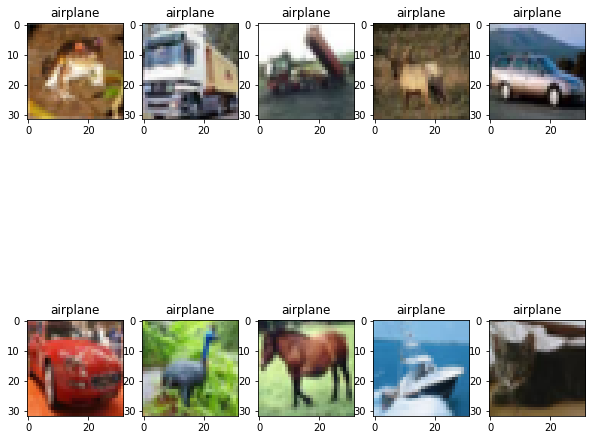

In [176]:
sample = x_train[:10]

fig, ax = plt.subplots(2,5,figsize=(10,10))
for i in range(2):
    for j in range(5):
        ax[i][j].imshow(sample[5*i+j])
        ax[i][j].set_title(classes[y_train[5*i+j].argmax()])

# DATA NORMALISATION

In [177]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# CNN

In [178]:
cnn = Sequential()    #allows us to create a flexible model in which we can add layers easily

cnn.add(layers.Conv2D(filters=16, kernel_size=(3,3) , activation='relu', input_shape=(32,32,3)))
cnn.add(layers.MaxPooling2D((2,2)))
cnn.add(layers.Conv2D(filters=24, kernel_size=(3,3) , activation='relu'))
cnn.add(layers.MaxPooling2D((2,2)))

cnn.add(layers.Flatten())
cnn.add(layers.Dense(units=64, activation='relu'))
cnn.add(layers.Dense(units=10, activation='softmax'))

cnn.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [179]:
batch_size=1000
epochs=10

cnn.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
50/50 [==============================] - 1s 6ms/step - loss: 2.1923 - accuracy: 0.1951
Epoch 2/10
50/50 [==============================] - 0s 6ms/step - loss: 1.6716 - accuracy: 0.4007
Epoch 3/10
50/50 [==============================] - 0s 6ms/step - loss: 1.4887 - accuracy: 0.4719
Epoch 4/10
50/50 [==============================] - 0s 6ms/step - loss: 1.4022 - accuracy: 0.5038
Epoch 5/10
50/50 [==============================] - 0s 6ms/step - loss: 1.3488 - accuracy: 0.5232
Epoch 6/10
50/50 [==============================] - 0s 6ms/step - loss: 1.2995 - accuracy: 0.5434
Epoch 7/10
50/50 [==============================] - 0s 7ms/step - loss: 1.2746 - accuracy: 0.5516
Epoch 8/10
50/50 [==============================] - 0s 6ms/step - loss: 1.2307 - accuracy: 0.5700
Epoch 9/10
50/50 [==============================] - 0s 6ms/step - loss: 1.2104 - accuracy: 0.5800
Epoch 10/10
50/50 [==============================] - 0s 6ms/step - loss: 1.1859 - accuracy: 0.5846


# TEST

In [180]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 1.1902 - accuracy: 0.5828


[1.1901549100875854, 0.5827999711036682]

In [181]:
y_pred_classes=cnn.predict(x_test)
y_pred_classes=y_pred_classes.argmax(axis=1)

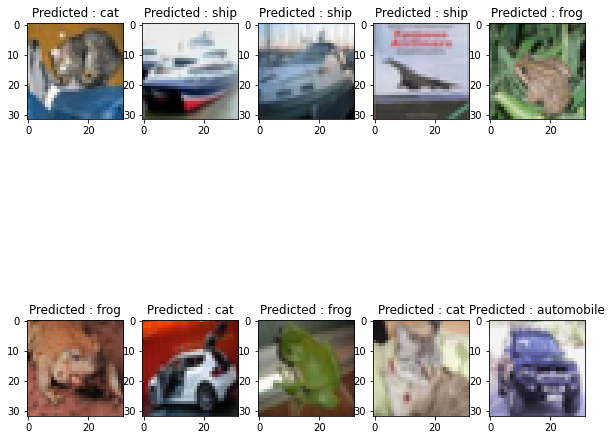

In [182]:
sample_test = x_test[:10]
y_pred_sample= y_pred_classes[:10]

fig, ax = plt.subplots(2,5,figsize=(10,10))
for i in range(2):
    for j in range(5):
        ax[i][j].imshow(sample_test[5*i+j])
        ax[i][j].set_title(f"Predicted : {classes[y_pred_sample[5*i+j]]}")

# SEE ERRORS

In [183]:
y_test=[classes[element] for element in y_test]
y_pred_classes=[classes[element] for element in y_pred_classes]

Text(0.5, 1.0, 'Confusion Matrix')

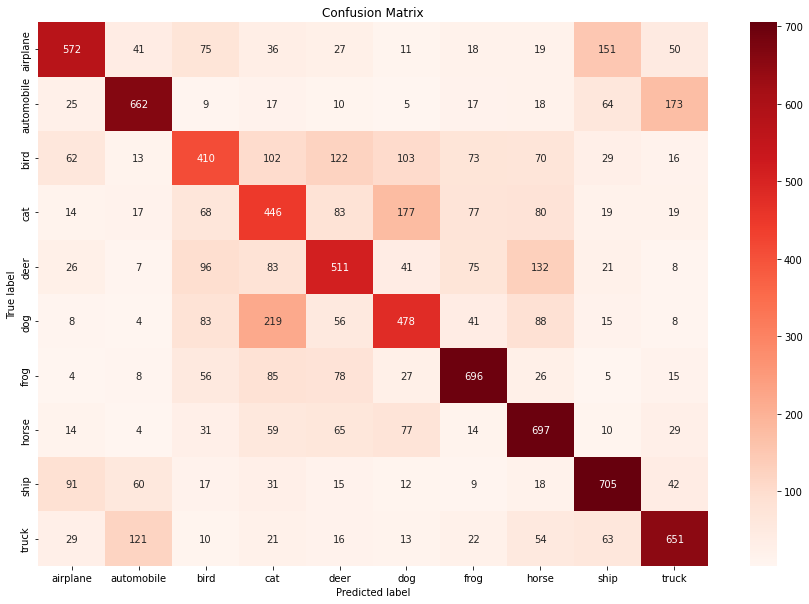

In [184]:
confusion_mtx=sklearn.metrics.confusion_matrix(y_test, y_pred_classes, labels=classes)

fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(confusion_mtx,fmt='d',annot=True,cmap="Reds",xticklabels=classes,yticklabels=classes)
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_title("Confusion Matrix")

In [225]:
print(sklearn.metrics.classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

    airplane       0.68      0.57      0.62      1000
  automobile       0.71      0.66      0.68      1000
        bird       0.48      0.41      0.44      1000
         cat       0.41      0.45      0.42      1000
        deer       0.52      0.51      0.52      1000
         dog       0.51      0.48      0.49      1000
        frog       0.67      0.70      0.68      1000
       horse       0.58      0.70      0.63      1000
        ship       0.65      0.70      0.68      1000
       truck       0.64      0.65      0.65      1000

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.58     10000
weighted avg       0.58      0.58      0.58     10000

